In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from random import random

In [381]:
nqubits=1
dev=qml.device('default.qubit',wires=nqubits)

In [533]:
@qml.qnode(dev)
def circ(p):

    qml.Hadamard(wires=0)
    qml.RZ(p[0],wires=0)
    #qml.RY(y,wires=0)
    qml.RX(p[1],wires=0)
    #qml.Rot(p[0],p[1],p[2],wires=0)
    return qml.state()

In [534]:
def F(state1,state2):
    return np.abs(np.dot(np.conjugate((state1)),state2))**2

In [535]:
def P_haar(fid):
    return (2**nqubits-1)*(1-fid)**(2**nqubits-2)

In [571]:
F(circ(p1),circ(p2))

0.46015751944687866

In [595]:
nsamples=100
P_f=[]
for p in range(nsamples):
    p1=2*np.pi*np.random.random(2) 
    p2=2*np.pi*np.random.random(2)
    P_f.append(F(circ(p1),circ(p2)))
    #prob_haar.append(P_haar())

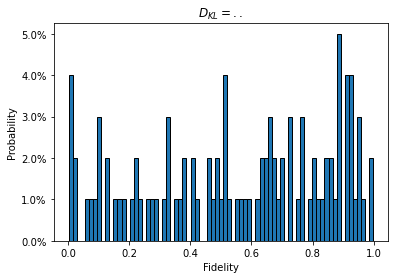

In [596]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
ax.hist(P_f, bins=bin_count, edgecolor='black')
#ax.hist(prob_haar, bins=bin_count, edgecolor='black')
#plt.bar(bin_middles, haar_prob, width=0.01, label="Haar")
ax.set_title("$D_{KL}=..$")
ax.set_xlabel("Fidelity")
ax.set_ylabel("Probability")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(P_f)))
plt.show()

In [597]:
f=np.linspace(0,1,nsamples)
prob_haar=[]
for i in f:
    prob_haar.append(P_haar(i))
len(prob_haar)

100

In [598]:
haar = prob_haar
haar_prob= prob_haar / (np.sum(prob_haar))
haar_prob

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [599]:
pqc_hist, bin_edges = np.histogram(P_f,nsamples, range=(0, 1), density=True)

In [600]:
#pqc_hist

In [601]:
pqc_prob = pqc_hist / (np.sum(pqc_hist))
#pqc_prob

In [602]:
s=[]
for i in range(nsamples):
    if haar_prob[i]!=0 and pqc_prob[i]!=0:
        s.append(pqc_prob[i]*np.log(pqc_prob[i]/haar_prob[i]))
    else:
        s.append(0)
np.sum(s)

0.5945430952473822

In [567]:
def kl_divergence(prob_a, prob_b):
        """Returns KL divergence between two probabilities"""
        #prob_a[prob_a == 0] = 1e-10
        kl_div = np.sum(np.where(prob_a != 0, prob_a * np.log(prob_a / prob_b), 0))
        return  kl_div

In [568]:
len(pqc_prob)

1000

In [569]:
kl_divergence(pqc_prob,haar_prob)

tensor(0.56837824, requires_grad=True)

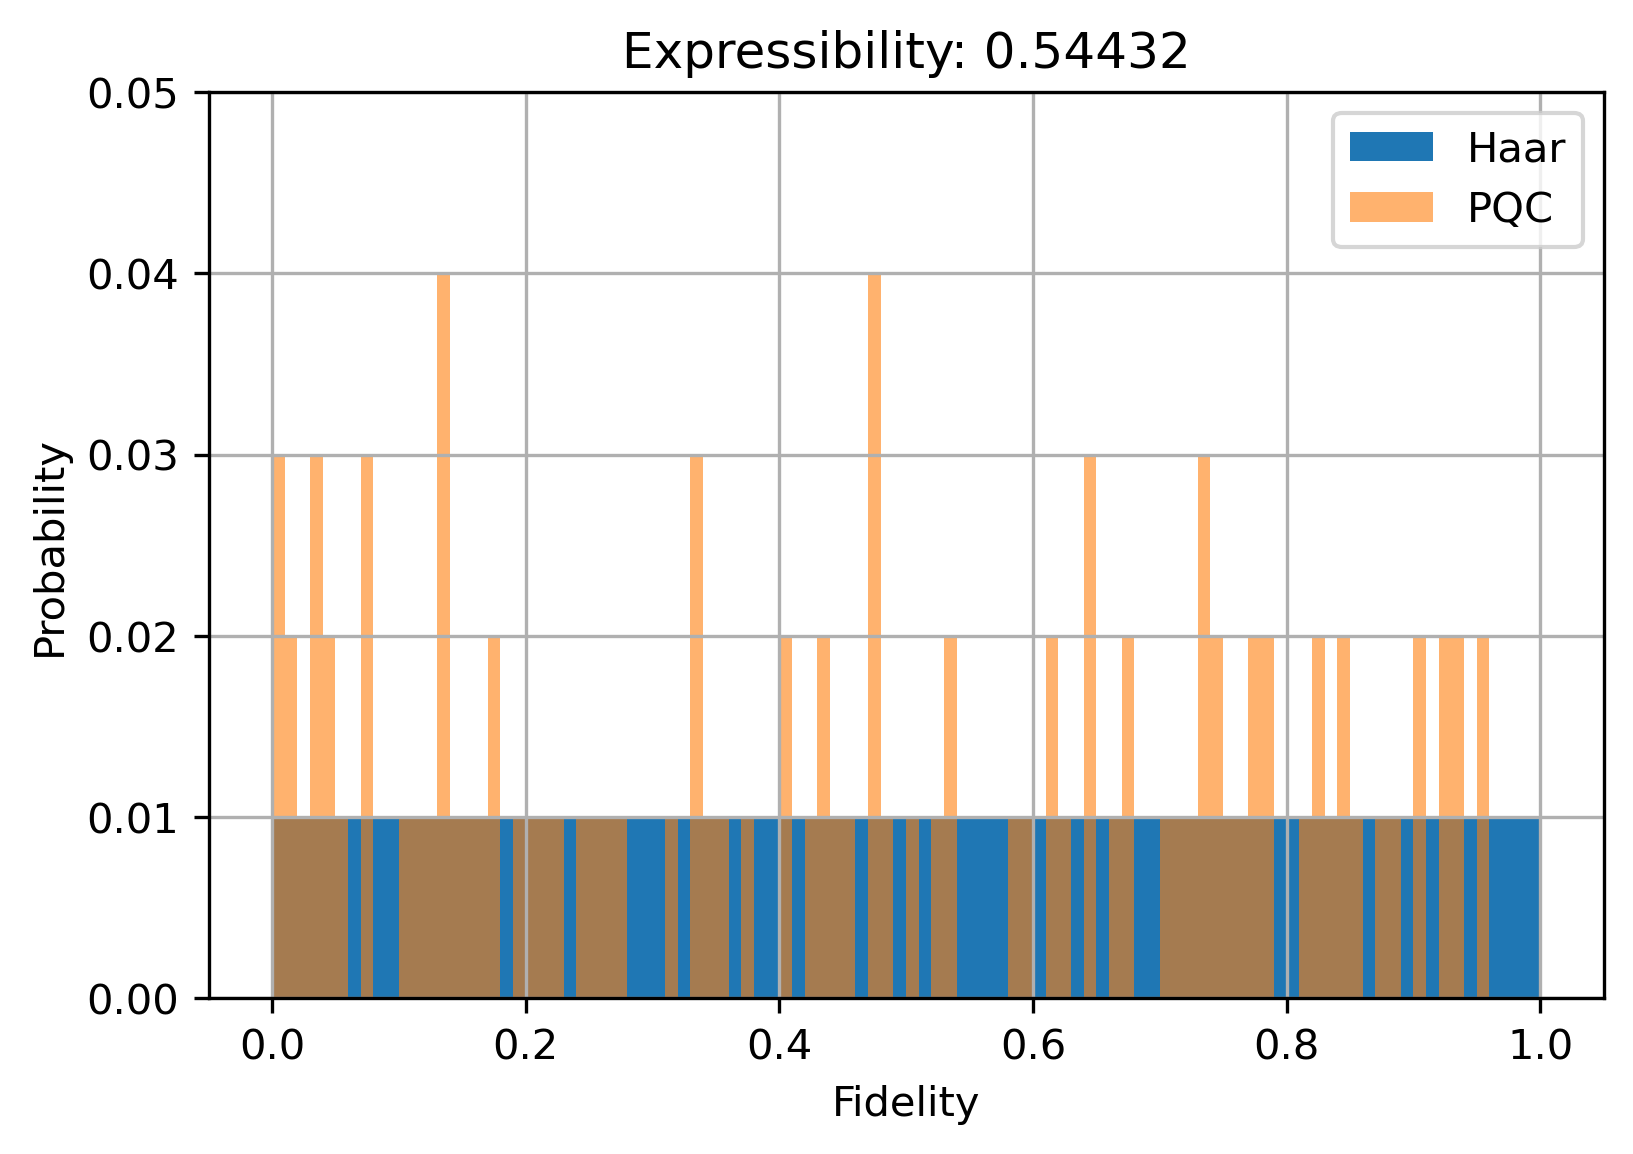

In [554]:
bin_middles = (bin_edges[1:] + bin_edges[:-1]) / 2.0
bin_width = bin_edges[1] - bin_edges[0]
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.bar(bin_middles, haar_prob, width=bin_width, label="Haar")
plt.bar(bin_middles, pqc_prob, width=bin_width, label="PQC", alpha=0.6)
plt.xlim((-0.05, 1.05))
plt.ylim(bottom=0.0, top=max(max(pqc_prob), max(haar_prob)) + 0.01)
plt.grid(True)
plt.title(f"Expressibility: {np.round(kl_divergence(pqc_prob,haar_prob),5)}")
plt.xlabel("Fidelity")
plt.ylabel("Probability")
plt.legend()


In [225]:
bin_edges[1]

0.01